<a href="https://colab.research.google.com/github/pravin-raut/MachineLearning/blob/Master/dissertation/01_Arima_Oil%26Currency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. Installing Libraries


In [45]:
!pip install quandl
!pip install yfinance
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Importing required libraries


In [46]:
import yfinance as yf
import pandas as pd
from datetime import datetime,timedelta
import quandl
import json

# Required configuration file which has secret API Key

In [47]:
import urllib.request

file_path = "https://raw.githubusercontent.com/pravin-raut/MachineLearning/Master/dissertation/Config_Git.json"

# Open the file for reading and load the data from it
with urllib.request.urlopen(file_path) as infile:
  data = json.load(infile)
# Set up API key
  api_key=data["nasdaq"]["api_key"]
quandl.ApiConfig.api_key = api_key


In [48]:
CurrentDate = (datetime.today() - timedelta(days=0)).strftime('%Y-%m-%d')
CurrentDate

'2023-06-24'

In [49]:
DayBefore1000 = (datetime.today() - timedelta(days=2000)).strftime('%Y-%m-%d')
DayBefore1000


'2018-01-01'

# Data Collection & Preparation

In [50]:
def getDataFromAPI(API,symbol,start_date,end_date):

  if API=="YFinance":
    # Create a ticker object
    ticker = yf.Ticker(symbol)
    # Download historical data
    data = ticker.history(period="1d", start=start_date, end=end_date)

  if API=="Nasdaq":
    data = quandl.get(symbol,start_date=start_date,end_date=end_date)


  return data

In [51]:
OilPriceInUSD=getDataFromAPI("Nasdaq","OPEC/ORB",DayBefore1000,CurrentDate).reset_index()
OilPriceInUSD['Date'] = pd.to_datetime(OilPriceInUSD['Date']).dt.date
OilPriceInUSD.set_index('Date', inplace=True)
OilPriceInUSD

,Value
Date,
2018-01-02,64.84
2018-01-03,65.13
2018-01-04,66.13
2018-01-05,65.86
2018-01-08,65.85
...,...
2023-06-16,75.89
2023-06-19,76.45
2023-06-20,76.85


In [52]:
OilPriceInUSD.isna().sum()

Value    0
dtype: int64

In [53]:
OilPriceInUSD=OilPriceInUSD.asfreq('b')
OilPriceInUSD.isna().sum()

Value    17
dtype: int64

In [54]:
OilPriceInUSD.Value=OilPriceInUSD.Value.fillna(method='bfill')

In [55]:
OilPriceInUSD.isna().sum()

Value    0
dtype: int64

In [56]:
EuroPriceInUSD=getDataFromAPI("YFinance","EURUSD=X",DayBefore1000,CurrentDate).reset_index()
EuroPriceInUSD['Date'] = pd.to_datetime(EuroPriceInUSD['Date']).dt.date
EuroPriceInUSD.set_index('Date', inplace=True)
EuroPriceInUSD

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-01-01,1.200495,1.201504,1.199904,1.200495,0,0.0,0.0
2018-01-02,1.201086,1.208094,1.200855,1.201158,0,0.0,0.0
2018-01-03,1.206200,1.206709,1.200495,1.206345,0,0.0,0.0
2018-01-04,1.201129,1.209190,1.200495,1.201043,0,0.0,0.0
2018-01-05,1.206622,1.208459,1.202154,1.206884,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-06-19,1.094212,1.094931,1.091100,1.094212,0,0.0,0.0
2023-06-20,1.092430,1.094523,1.089455,1.092430,0,0.0,0.0
2023-06-21,1.092037,1.096131,1.090667,1.092037,0,0.0,0.0


In [57]:
EuroPriceInUSD.isna().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [58]:
EuroPriceInUSD=EuroPriceInUSD.asfreq('b')
EuroPriceInUSD.isna().sum()

Open            1
High            1
Low             1
Close           1
Volume          1
Dividends       1
Stock Splits    1
dtype: int64

In [59]:
EuroPriceInUSD.Close=EuroPriceInUSD.Close.fillna(method='bfill')

In [60]:
EuroPriceInUSD.isna().sum()

Open            1
High            1
Low             1
Close           0
Volume          1
Dividends       1
Stock Splits    1
dtype: int64

In [61]:
data=EuroPriceInUSD.merge(OilPriceInUSD, on='Date', how='inner').reset_index()
data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Value
0,2018-01-02,1.201086,1.208094,1.200855,1.201158,0.0,0.0,0.0,64.84
1,2018-01-03,1.206200,1.206709,1.200495,1.206345,0.0,0.0,0.0,65.13
2,2018-01-04,1.201129,1.209190,1.200495,1.201043,0.0,0.0,0.0,66.13
3,2018-01-05,1.206622,1.208459,1.202154,1.206884,0.0,0.0,0.0,65.86
4,2018-01-08,1.203949,1.205400,1.195972,1.203746,0.0,0.0,0.0,65.85
...,...,...,...,...,...,...,...,...,...
1423,2023-06-16,1.094595,1.097100,1.092013,1.094595,0.0,0.0,0.0,75.89
1424,2023-06-19,1.094212,1.094931,1.091100,1.094212,0.0,0.0,0.0,76.45
1425,2023-06-20,1.092430,1.094523,1.089455,1.092430,0.0,0.0,0.0,76.85
1426,2023-06-21,1.092037,1.096131,1.090667,1.092037,0.0,0.0,0.0,77.24


In [62]:
selected_data = data[['Date', 'Close', 'Value']]
selected_data = selected_data.rename(columns={'Close': 'USD_EUR_Price', 'Value': 'Oil_Price'})
selected_data['Date'] = pd.to_datetime(selected_data['Date'])
selected_data.set_index('Date', inplace=True)
selected_data

,USD_EUR_Price,Oil_Price
Date,,
2018-01-02,1.201158,64.84
2018-01-03,1.206345,65.13
2018-01-04,1.201043,66.13
2018-01-05,1.206884,65.86
2018-01-08,1.203746,65.85
...,...,...
2023-06-16,1.094595,75.89
2023-06-19,1.094212,76.45
2023-06-20,1.092430,76.85


In [63]:
selected_data['USD_EUR_Price'].describe()


count    1428.000000
mean        1.131187
std         0.059748
min         0.959619
25%         1.095272
50%         1.131260
75%         1.177361
max         1.251001
Name: USD_EUR_Price, dtype: float64

In [64]:
selected_data['Oil_Price'].describe()


count    1428.000000
mean       69.862136
std        20.251101
min        12.220000
25%        60.577500
50%        69.435000
75%        79.922500
max       128.270000
Name: Oil_Price, dtype: float64

# Data Visualization

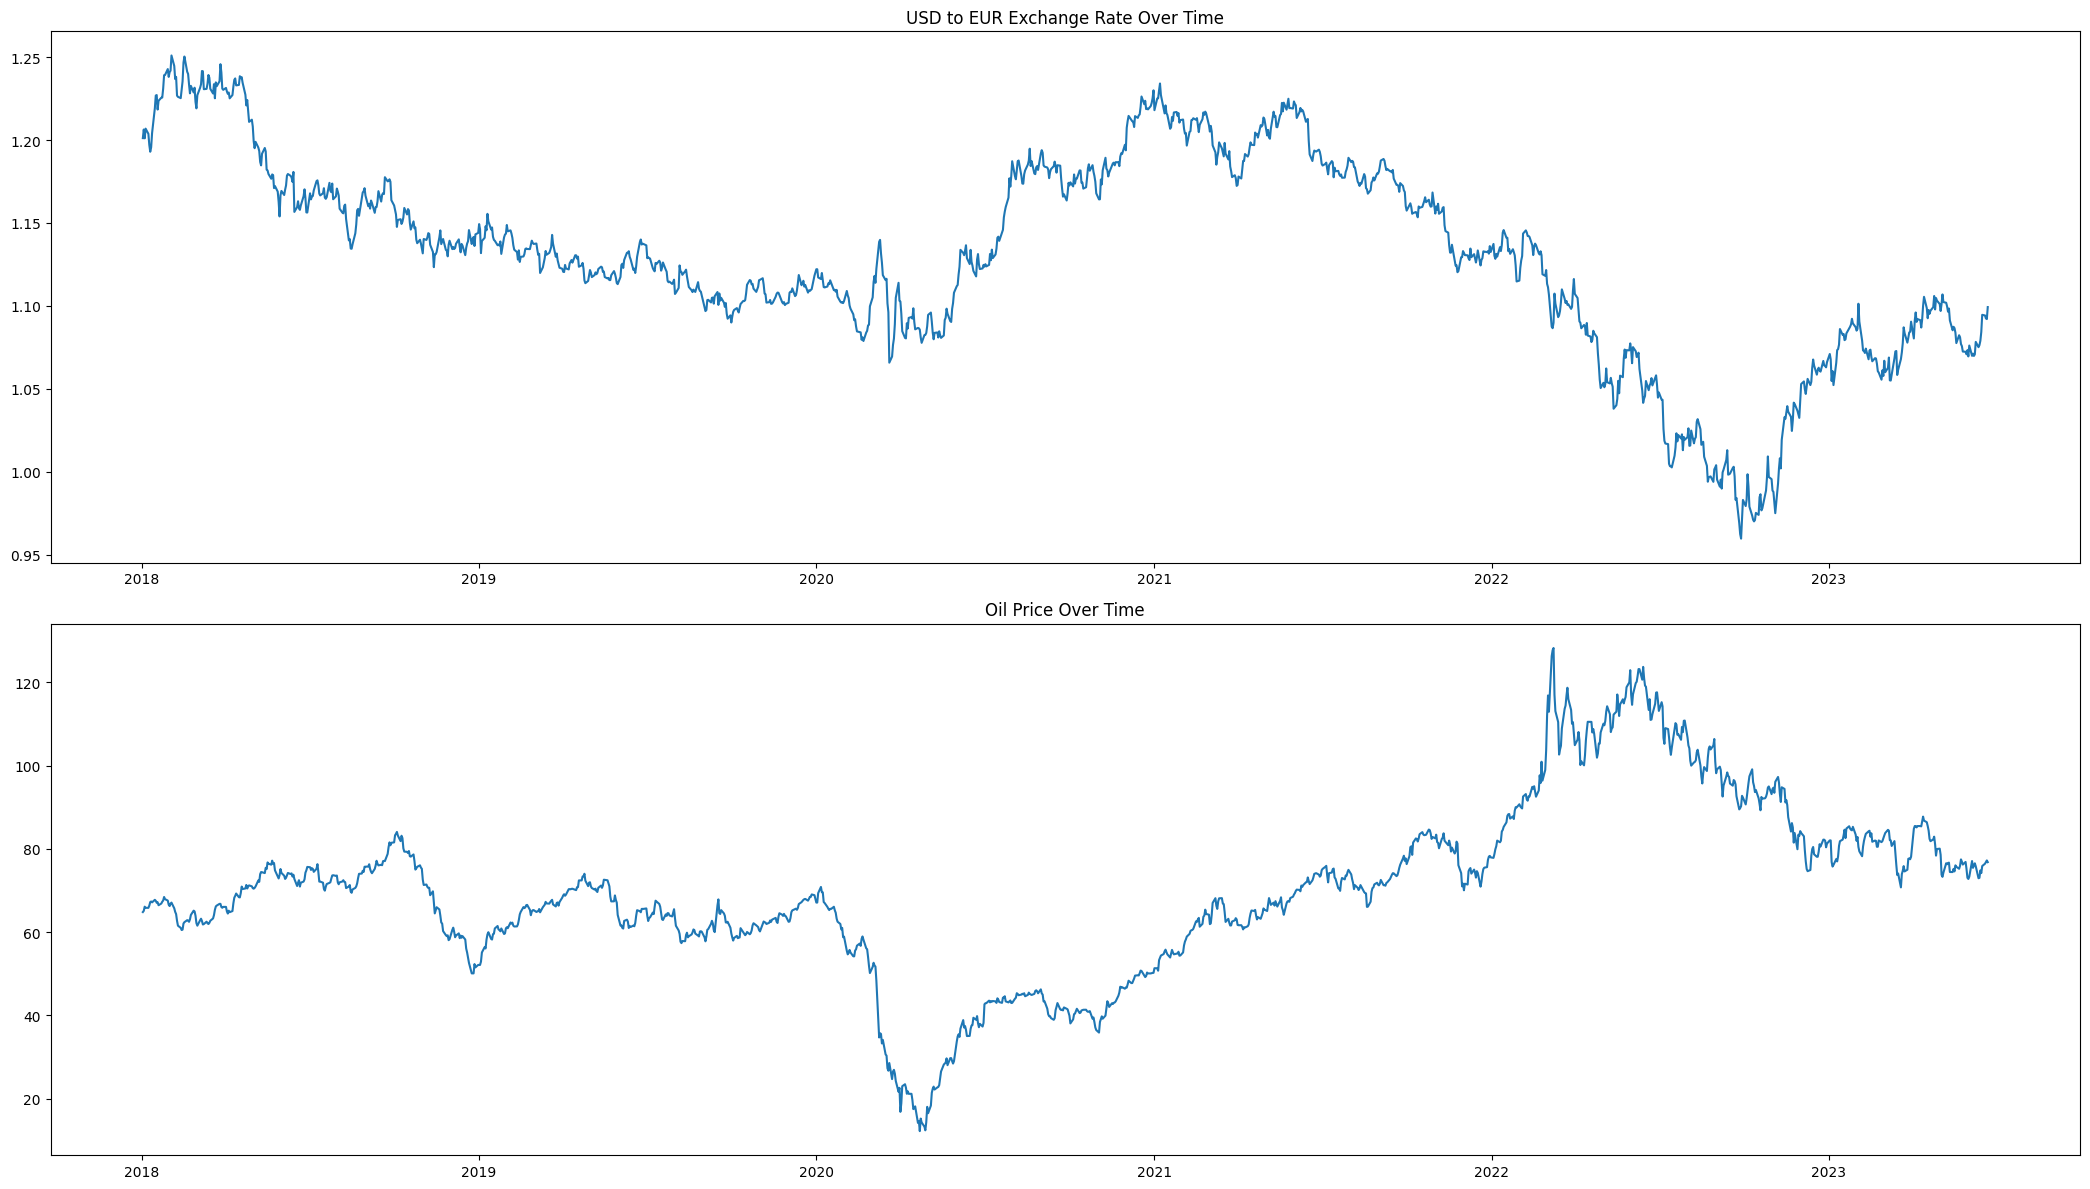

In [65]:
import matplotlib.pyplot as plt

# Create the figure and subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(21, 12))

# Plot the first chart on the first subplot
ax1.plot(selected_data.index, selected_data['USD_EUR_Price'])
ax1.set_title('USD to EUR Exchange Rate Over Time')

# Plot the second chart on the second subplot
ax2.plot(selected_data.index, selected_data['Oil_Price'])
ax2.set_title('Oil Price Over Time')

# Adjust spacing between subplots
plt.tight_layout()

# Display the figure with both charts
plt.show()


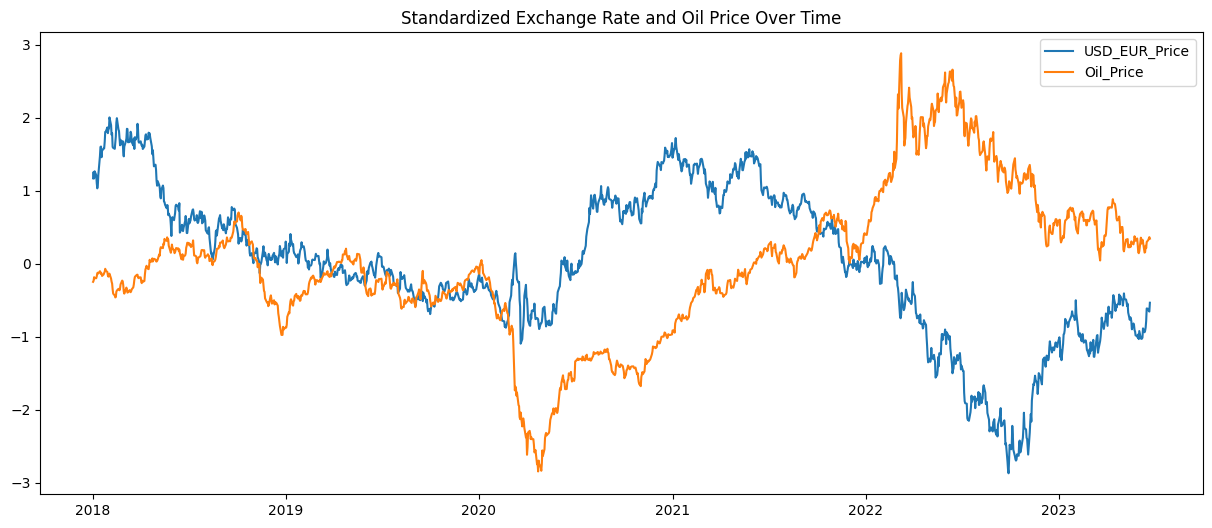

In [66]:
import matplotlib.pyplot as plt
import pandas as pd

selected_data['USD_EUR_Price_standardized'] = (selected_data['USD_EUR_Price'] - selected_data['USD_EUR_Price'].mean()) / selected_data['USD_EUR_Price'].std()
selected_data['Oil_Price_standardized'] = (selected_data['Oil_Price'] - selected_data['Oil_Price'].mean()) / selected_data['Oil_Price'].std()

fig, ax = plt.subplots(figsize=(15, 6))

ax.plot(selected_data.index, selected_data['USD_EUR_Price_standardized'], label='USD_EUR_Price')
ax.plot(selected_data.index, selected_data['Oil_Price_standardized'], label='Oil_Price')

ax.set_title('Standardized Exchange Rate and Oil Price Over Time')
ax.legend()

plt.show()


In [67]:
selected_data = selected_data.drop(['USD_EUR_Price_standardized', 'Oil_Price_standardized'], axis=1)
selected_data

,USD_EUR_Price,Oil_Price
Date,,
2018-01-02,1.201158,64.84
2018-01-03,1.206345,65.13
2018-01-04,1.201043,66.13
2018-01-05,1.206884,65.86
2018-01-08,1.203746,65.85
...,...,...
2023-06-16,1.094595,75.89
2023-06-19,1.094212,76.45
2023-06-20,1.092430,76.85


# Data Stationary Prepartion

In [68]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(data, column):
    # 1. Perform Augmented Dickey-Fuller test on the original data
    result_original = adfuller(data[column])
    adf_statistic_original = result_original[0]
    p_value_original = result_original[1]
    print('ADF Statistic (Original Data): %f' % adf_statistic_original)
    print('p-value (Original Data): %f' % p_value_original)

    if p_value_original <= 0.05:
        print("Null hypothesis of stationarity is rejected for the original data.")
    else:
        print("Null hypothesis of stationarity holds true for the original data.")

    # Calculate the first difference
    data[column+'_diff'] = data[column].diff()

    # 2. Perform Augmented Dickey-Fuller test on the differenced data
    data_diff = data[column+'_diff'].dropna()
    result_diff = adfuller(data_diff)
    adf_statistic_diff = result_diff[0]
    p_value_diff = result_diff[1]
    print('ADF Statistic (Differenced Data): %f' % adf_statistic_diff)
    print('p-value (Differenced Data): %f' % p_value_diff)

    if p_value_diff <= 0.05:
        print("Null hypothesis of stationarity is rejected for the differenced data.")
    else:
        print("Null hypothesis of stationarity holds true for the differenced data.")


    # Calculate returns
    data[column+'_Returns_diff']= data[column].pct_change().diff()

    # 3. Perform Augmented Dickey-Fuller test on the returns
    data_returns = data[column+'_Returns_diff'].dropna()
    result_returns = adfuller(data_returns)
    adf_statistic_returns = result_returns[0]
    p_value_returns = result_returns[1]
    print('ADF Statistic (Returns): %f' % adf_statistic_returns)
    print('p-value (Returns): %f' % p_value_returns)

    if p_value_returns <= 0.05:
        print("Null hypothesis of stationarity is rejected for the returns.")
    else:
        print("Null hypothesis of stationarity holds true for the returns.")

In [69]:
check_stationarity(selected_data, 'USD_EUR_Price')


ADF Statistic (Original Data): -1.781168
p-value (Original Data): 0.389851
Null hypothesis of stationarity holds true for the original data.
ADF Statistic (Differenced Data): -36.673619
p-value (Differenced Data): 0.000000
Null hypothesis of stationarity is rejected for the differenced data.
ADF Statistic (Returns): -13.087010
p-value (Returns): 0.000000
Null hypothesis of stationarity is rejected for the returns.


In [70]:
selected_data

,USD_EUR_Price,Oil_Price,USD_EUR_Price_diff,USD_EUR_Price_Returns_diff
Date,,,,
2018-01-02,1.201158,64.84,NaN,NaN
2018-01-03,1.206345,65.13,0.005188,NaN
2018-01-04,1.201043,66.13,-0.005303,-0.008715
2018-01-05,1.206884,65.86,0.005841,0.009260
2018-01-08,1.203746,65.85,-0.003138,-0.007464
...,...,...,...,...
2023-06-16,1.094595,75.89,0.010290,0.004513
2023-06-19,1.094212,76.45,-0.000383,-0.009840
2023-06-20,1.092430,76.85,-0.001781,-0.001278


In [71]:
check_stationarity(selected_data, 'Oil_Price')


ADF Statistic (Original Data): -1.803967
p-value (Original Data): 0.378494
Null hypothesis of stationarity holds true for the original data.
ADF Statistic (Differenced Data): -7.584717
p-value (Differenced Data): 0.000000
Null hypothesis of stationarity is rejected for the differenced data.
ADF Statistic (Returns): -14.491704
p-value (Returns): 0.000000
Null hypothesis of stationarity is rejected for the returns.


In [72]:
selected_data

,USD_EUR_Price,Oil_Price,USD_EUR_Price_diff,USD_EUR_Price_Returns_diff,Oil_Price_diff,Oil_Price_Returns_diff
Date,,,,,,
2018-01-02,1.201158,64.84,NaN,NaN,NaN,NaN
2018-01-03,1.206345,65.13,0.005188,NaN,0.29,NaN
2018-01-04,1.201043,66.13,-0.005303,-0.008715,1.00,0.010881
2018-01-05,1.206884,65.86,0.005841,0.009260,-0.27,-0.019437
2018-01-08,1.203746,65.85,-0.003138,-0.007464,-0.01,0.003931
...,...,...,...,...,...,...
2023-06-16,1.094595,75.89,0.010290,0.004513,1.69,0.031328
2023-06-19,1.094212,76.45,-0.000383,-0.009840,0.56,-0.015397
2023-06-20,1.092430,76.85,-0.001781,-0.001278,0.40,-0.002147


In [73]:
from pmdarima.arima.utils import ndiffs

In [74]:
ndiffs(selected_data.USD_EUR_Price,test="adf")

1

In [75]:
ndiffs(selected_data.Oil_Price,test="adf")

1

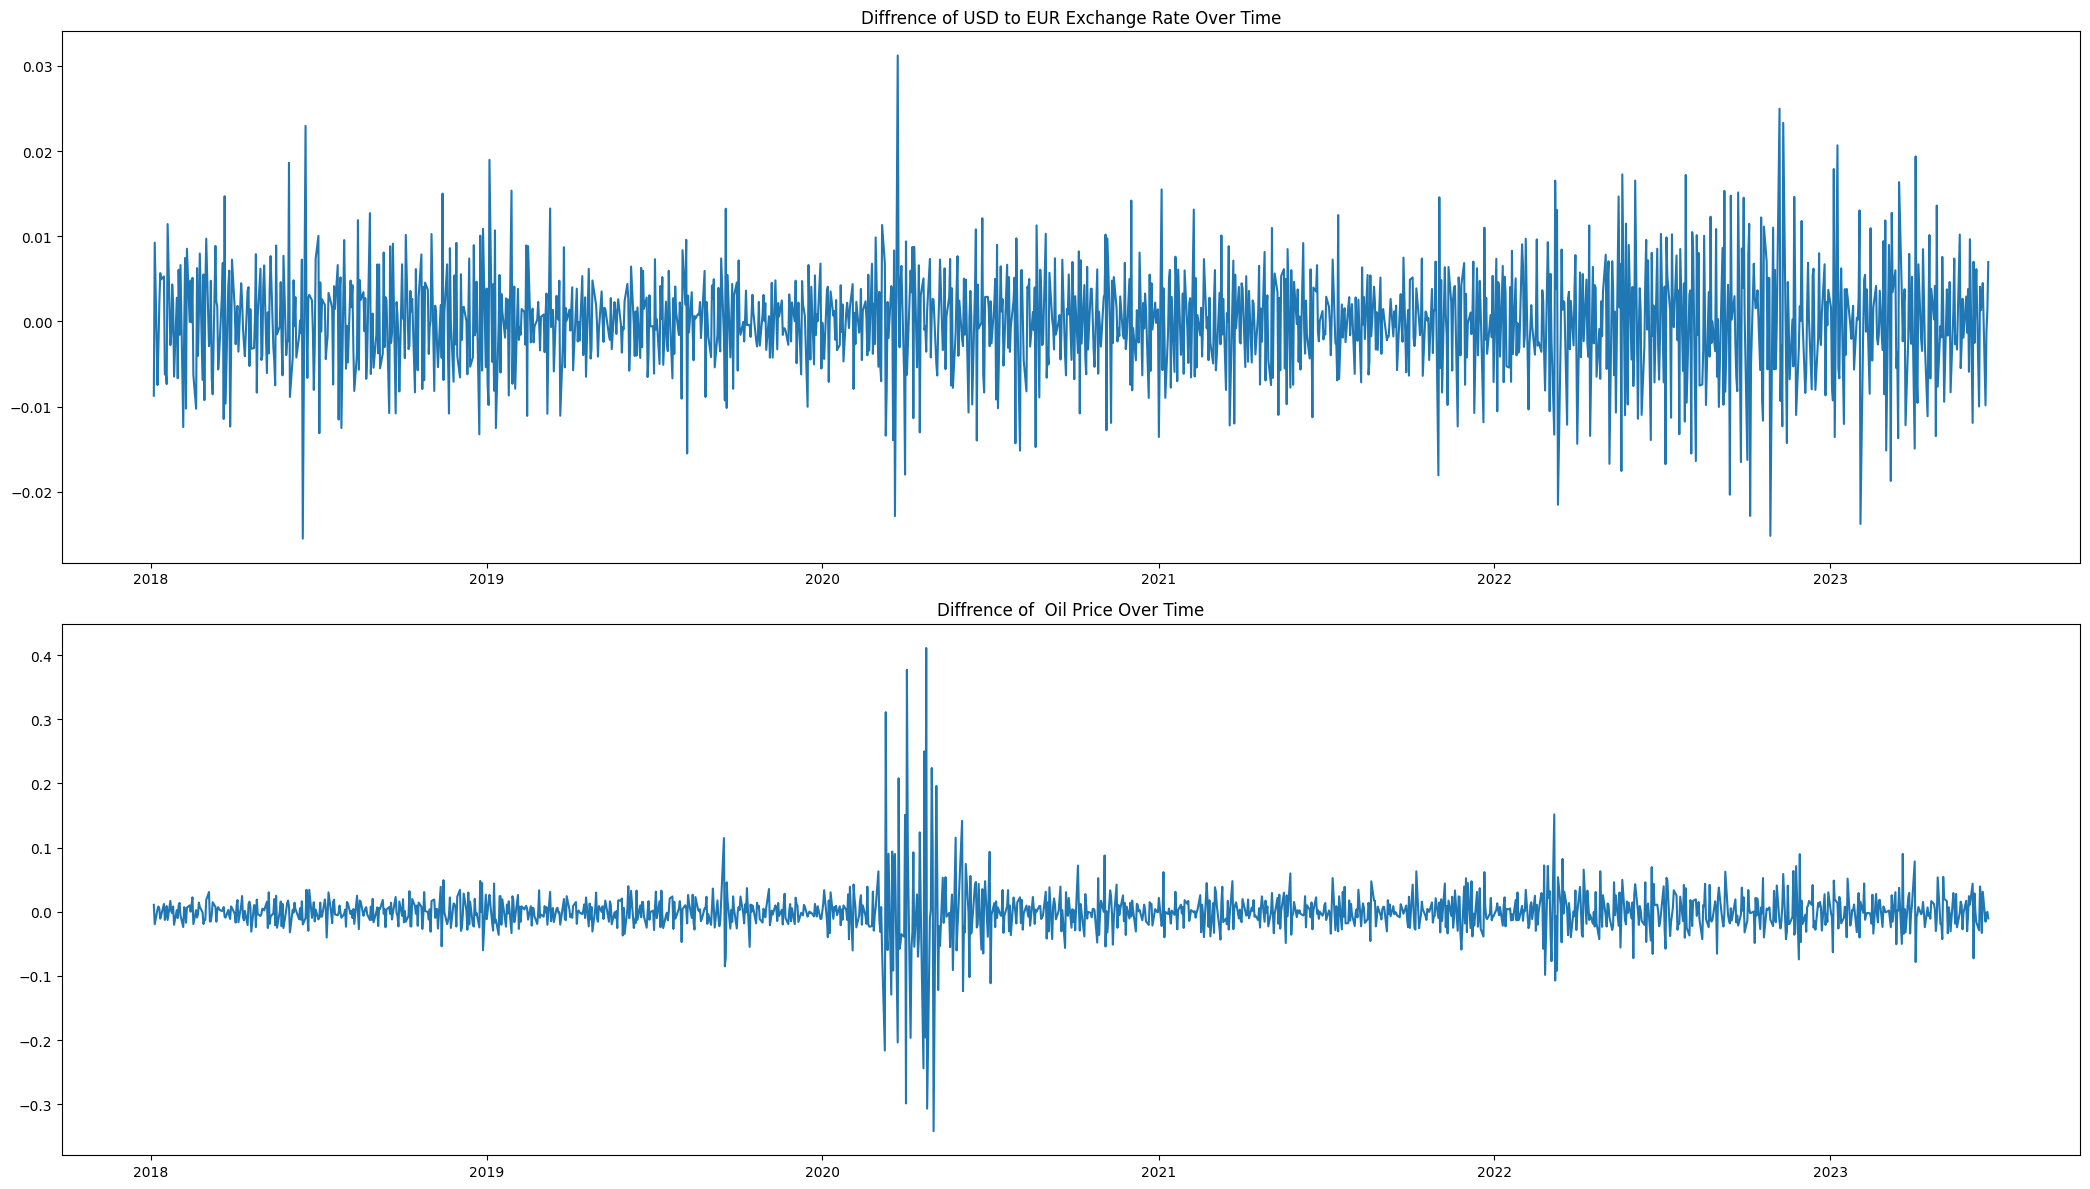

In [76]:
import matplotlib.pyplot as plt

# Create the figure and subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(21, 12))

# Plot the first chart on the first subplot
ax1.plot(selected_data.index, selected_data['USD_EUR_Price_Returns_diff'])
ax1.set_title('Diffrence of USD to EUR Exchange Rate Over Time')

# Plot the second chart on the second subplot
ax2.plot(selected_data.index, selected_data['Oil_Price_Returns_diff'])
ax2.set_title('Diffrence of  Oil Price Over Time')

# Adjust spacing between subplots
plt.tight_layout()

# Display the figure with both charts
plt.show()


# Training & Testing Data Splitting

In [77]:
# Perform an 80-20 split for training and testing
train_data_size = int(0.8 * len(selected_data))
train_data = selected_data.iloc[:train_data_size]
test_data = selected_data.iloc[train_data_size:]

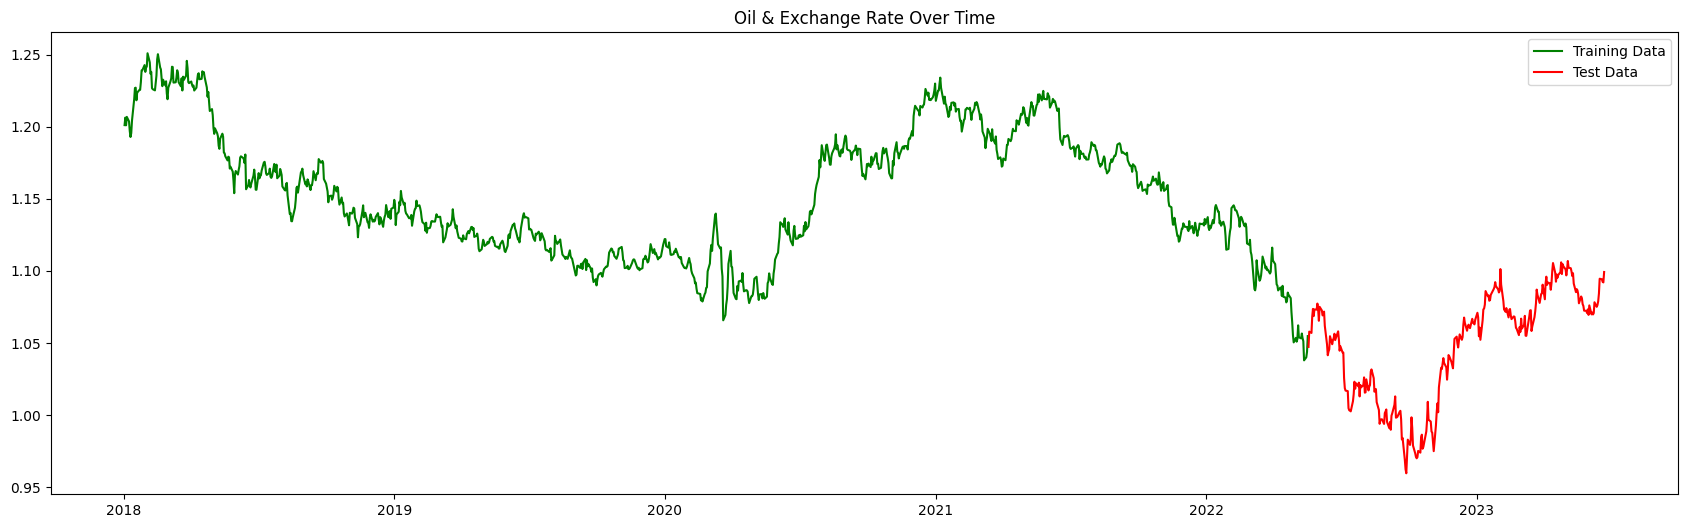

In [78]:
import matplotlib.pyplot as plt

# Plotting the entire data
plt.figure(figsize=(21, 6))

# Plotting the training data
plt.plot(train_data.index, train_data['USD_EUR_Price'], color='green', label='Training Data')

# Plotting the test data
plt.plot(test_data.index, test_data['USD_EUR_Price'], color='red', label='Test Data')

plt.title('Oil & Exchange Rate Over Time')
plt.legend()
plt.show()


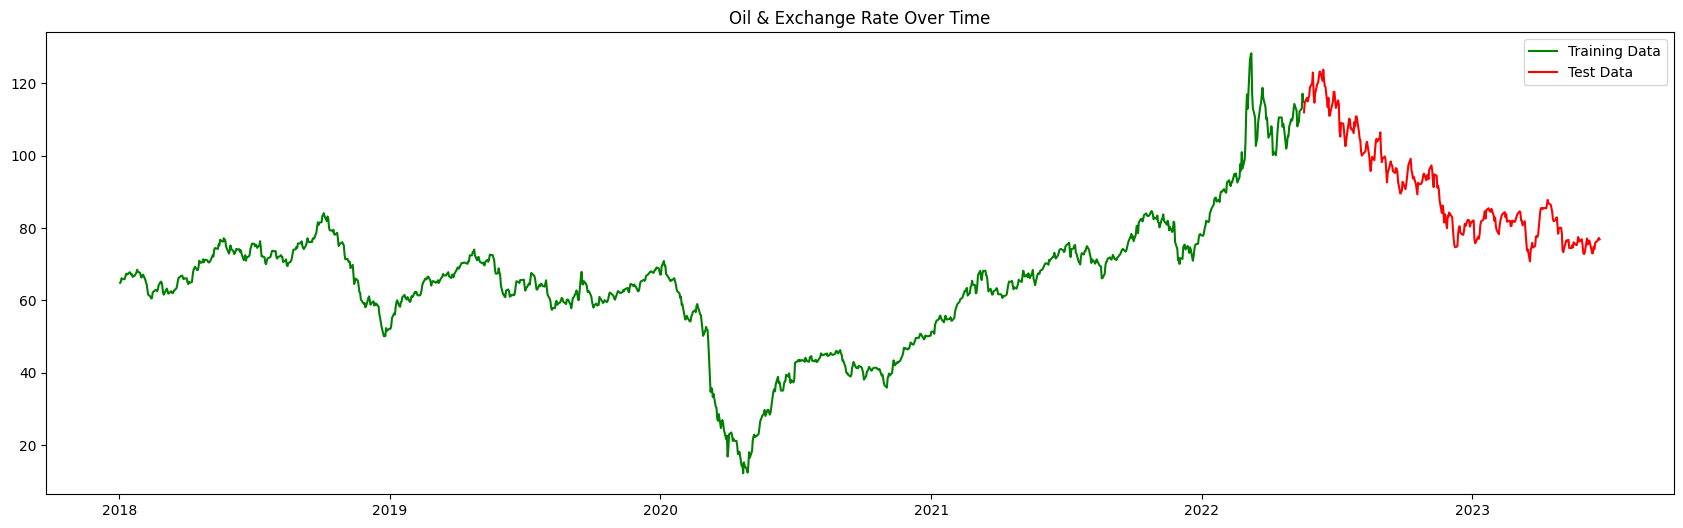

In [79]:
import matplotlib.pyplot as plt

# Plotting the entire data
plt.figure(figsize=(21, 6))

# Plotting the training data
plt.plot(train_data.index, train_data['Oil_Price'], color='green', label='Training Data')

# Plotting the test data
plt.plot(test_data.index, test_data['Oil_Price'], color='red', label='Test Data')

plt.title('Oil & Exchange Rate Over Time')
plt.legend()
plt.show()


In [80]:
print('Training data shape: ', train_data.shape)
print('Test data shape: ', test_data.shape)

Training data shape:  (1142, 6)
Test data shape:  (286, 6)


#Check ACF and PACF  values

In [81]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def plot_acf_values(data, lags):
    fig, ax = plt.subplots(figsize=(12, 4))
    plot_acf(data.dropna(), lags=lags, ax=ax,zero=False)
    plt.title('ACF')
    plt.show()

def plot_pacf_values(data, lags):
    fig, ax = plt.subplots(figsize=(12, 4))
    plot_pacf(data.dropna(), lags=lags, ax=ax,zero=False,alpha=0.05)
    plt.title('PACF')
    plt.show()



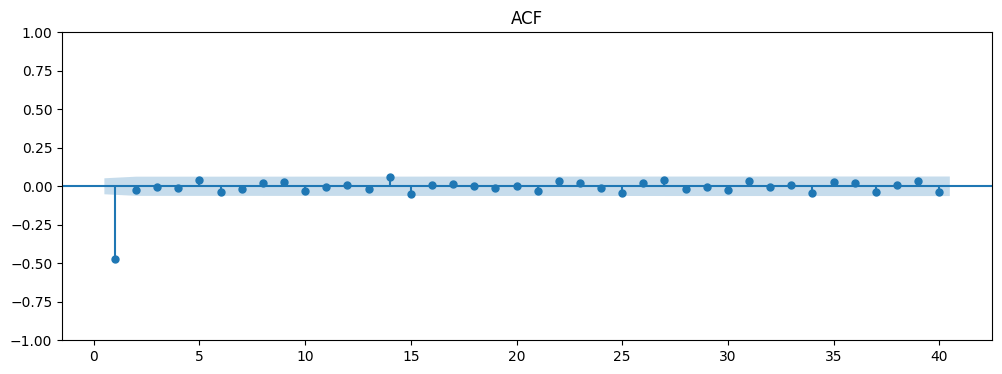

In [82]:

plot_acf_values(selected_data['USD_EUR_Price_Returns_diff'].dropna(), lags=40)
#Their is no considerbale point which is well outside the blue line , hence its difficult to pick value of P

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


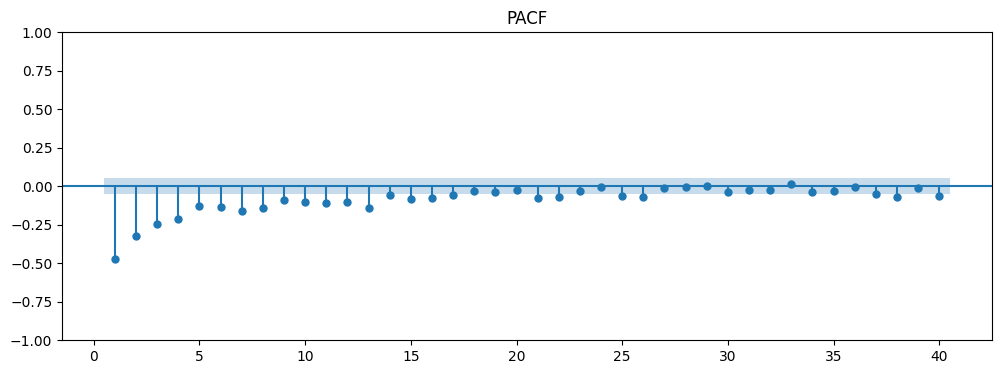

In [83]:
plot_pacf_values(selected_data['USD_EUR_Price_Returns_diff'].dropna(), lags=40)
#Their is no considerbale point which is well outside the blue line , hence its difficult to pick value of q

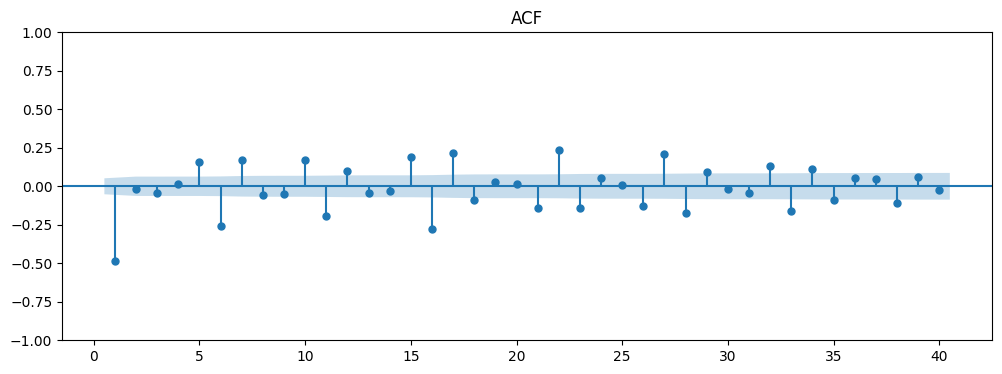

In [84]:
plot_acf_values(selected_data['Oil_Price_Returns_diff'].dropna(), lags=40)
#P can be 1 as it well out side the line

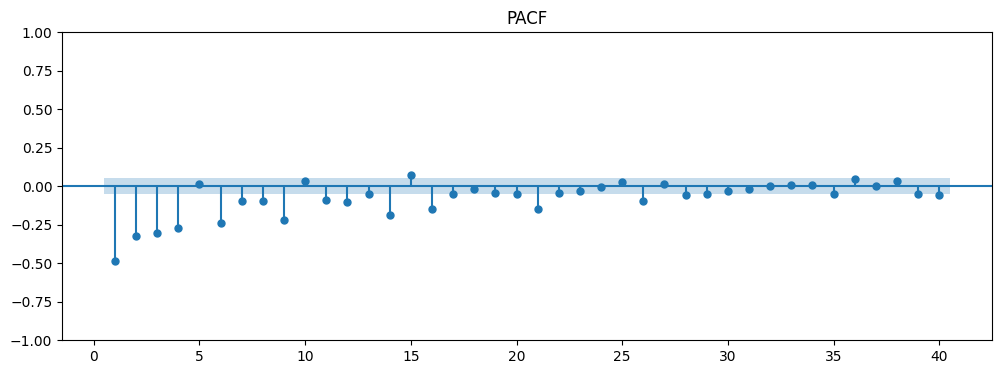

In [85]:
plot_pacf_values(selected_data['Oil_Price_Returns_diff'].dropna(), lags=40)
#Q can be 1 as it well out side the line

# Trying Auto Arima to see if it can provide any other value for P,D,Q

In [86]:
selected_data = selected_data.dropna()
selected_data

,USD_EUR_Price,Oil_Price,USD_EUR_Price_diff,USD_EUR_Price_Returns_diff,Oil_Price_diff,Oil_Price_Returns_diff
Date,,,,,,
2018-01-04,1.201043,66.13,-0.005303,-0.008715,1.00,0.010881
2018-01-05,1.206884,65.86,0.005841,0.009260,-0.27,-0.019437
2018-01-08,1.203746,65.85,-0.003138,-0.007464,-0.01,0.003931
2018-01-09,1.197046,66.39,-0.006700,-0.002966,0.54,0.008352
2018-01-10,1.192933,67.24,-0.004113,0.002131,0.85,0.004603
...,...,...,...,...,...,...
2023-06-16,1.094595,75.89,0.010290,0.004513,1.69,0.031328
2023-06-19,1.094212,76.45,-0.000383,-0.009840,0.56,-0.015397
2023-06-20,1.092430,76.85,-0.001781,-0.001278,0.40,-0.002147


In [87]:
from pmdarima import auto_arima

# Fit auto_arima function
model = auto_arima(selected_data['USD_EUR_Price_Returns_diff'],
                   start_p=1, start_q=1,
                   max_p=5, max_q=5, m=0,
                   start_P=0, seasonal=False,
                   d=0, D=0, trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)

# Print model summary
print(model.summary())


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-11089.602, Time=0.56 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-10366.200, Time=0.15 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-10723.410, Time=0.15 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-11063.886, Time=0.23 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-11087.850, Time=0.97 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-11252.385, Time=1.82 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-11169.306, Time=0.90 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-11158.997, Time=1.45 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-11183.299, Time=1.23 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=-11228.217, Time=0.93 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=5.08 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-11146.914, Time=4.11 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0]          
Total fit time: 17.592 seconds
                               SARIMAX Results                        

In [88]:
from pmdarima import auto_arima

# Fit auto_arima function
model = auto_arima(selected_data['Oil_Price_Returns_diff'],
                   start_p=1, start_q=1,
                   max_p=5, max_q=5, m=0,
                   start_P=0, seasonal=False,
                   d=0, D=0, trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)

# Print model summary
print(model.summary())


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=2.48 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-5184.073, Time=0.32 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-5561.282, Time=0.31 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=1.93 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-5717.281, Time=0.63 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-5851.441, Time=1.27 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=-5955.173, Time=2.54 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=-5953.428, Time=1.07 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=-6107.473, Time=3.73 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=3.35 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=-6121.332, Time=5.40 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=-6119.179, Time=6.18 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=inf, Time=4.62 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=-6076.137, Time=9.18 sec

Best model:  ARIMA(5,0,1)(0,0,0)[0]       

# ARIMA Model calling

In [89]:
import warnings
warnings.filterwarnings("ignore")


In [90]:
from statsmodels.tsa.arima.model import ARIMA


1. **Oil_Price**: This is the variable you're interested in — you're looking at how changes in oil price impact the USD_EUR_Price.

   - **coef**: The coefficient of -0.0002 tells you that for every unit increase in oil price, the USD_EUR_Price decreases by 0.0002 units on average, assuming all other variables are held constant. In other words, there is a slight negative relationship between oil price and the USD to EUR exchange rate.
   
   - **std err**: This is the standard error of the estimate for the coefficient. It measures the accuracy of the coefficient by estimating the variability. The smaller the standard error, the more confident we can be in our coefficient estimate.

   - **z**: This is the z-statistic. It's calculated by dividing the estimated coefficient by the standard error. The larger the absolute value of z, the stronger the evidence that the actual value of the coefficient is not zero.

   - **P>|z|**: This is the p-value associated with the z-statistic. It tells you the probability of observing your data given the null hypothesis that the actual value of the coefficient is zero. In this case, the p-value is 0.000, so you'd reject the null hypothesis and conclude that the oil price has a statistically significant effect on the USD to EUR exchange rate.

   - **[0.025	0.975]**: These are the bounds of the 95% confidence interval for the coefficient. If you repeated your study many times, you'd expect the true population coefficient to fall within this range about 95% of the time.

2. **ar.L1** and **ma.L1**: These are the parameters for the autoregressive and moving average components of your ARIMA model. The AR component (ar.L1) captures the influence of past values on the current value. The MA component (ma.L1) captures the influence of past error terms on the current error term.

   - For both ar.L1 and ma.L1, the coefficients are -0.1178 and 0.1589 respectively, indicating the weight or influence of these components.

   - The standard errors are quite large, suggesting less confidence in these estimates.

   - The z-scores are very small, suggesting these coefficients could be zero.

   - The p-values (P>|z|) are well above 0.05, which indicates these parameters are not statistically significant. In other words, the past values and the past error terms do not have a significant effect on the current USD to EUR exchange rate, once we've accounted for the effect of oil price.

Higher log likelihood and lower Information Criteria

In [91]:
train_data

,USD_EUR_Price,Oil_Price,USD_EUR_Price_diff,USD_EUR_Price_Returns_diff,Oil_Price_diff,Oil_Price_Returns_diff
Date,,,,,,
2018-01-02,1.201158,64.84,NaN,NaN,NaN,NaN
2018-01-03,1.206345,65.13,0.005188,NaN,0.29,NaN
2018-01-04,1.201043,66.13,-0.005303,-0.008715,1.00,0.010881
2018-01-05,1.206884,65.86,0.005841,0.009260,-0.27,-0.019437
2018-01-08,1.203746,65.85,-0.003138,-0.007464,-0.01,0.003931
...,...,...,...,...,...,...
2022-05-12,1.051248,109.20,-0.002048,0.001162,0.28,-0.005201
2022-05-13,1.037958,112.27,-0.013290,-0.010697,3.07,0.025543
2022-05-16,1.040063,112.98,0.002105,0.014670,0.71,-0.021790


In [112]:
cur_model=ARIMA(selected_data['USD_EUR_Price_Returns_diff'],order=(1,0,2),exog=selected_data['Oil_Price_Returns_diff'])
cur_model_fit=cur_model.fit()
cur_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   SARIMAX Results                                    
======================================================================================
Dep. Variable:     USD_EUR_Price_Returns_diff   No. Observations:                 1426
Model:                         ARIMA(1, 0, 2)   Log Likelihood                5578.236
Date:                        Sat, 24 Jun 2023   AIC                         -11144.472
Time:                                11:33:16   BIC                         -11112.897
Sample:                            01-04-2018   HQIC                        -11132.679
                                 - 06-22-2023                                         
Covariance Type:                          opg                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -2.236e-06   2.43e-05     -0.092      0.927      -5e-05    4.55e-05
Oil_Price_Returns_diff    -0.0111      0.003     -3.277      0.001      -0.018      -0.004
ar.L1                     -0.7010      0.371     -1.887      0.059      -1.429       0.027
ma.L1                     -0.0899      0.364     -0.247      0.805      -0.804       0.624
ma.L2                     -0.5888      0.287     -2.050      0.040      -1.152      -0.026
sigma2                  2.333e-05   6.96e-07     33.524      0.000     2.2e-05    2.47e-05
===================================================================================
Ljung-Box (L1) (Q):                   6.22   Jarque-Bera (JB):               110.38
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               1.84   Skew:                            -0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [93]:

oil_model=ARIMA(selected_data['Oil_Price_Returns_diff'],order=(5,0,3))
oil_model_fit=oil_model.fit()
oil_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                  
==================================================================================
Dep. Variable:     Oil_Price_Returns_diff   No. Observations:                 1426
Model:                     ARIMA(5, 0, 3)   Log Likelihood                3109.697
Date:                    Sat, 24 Jun 2023   AIC                          -6199.394
Time:                            11:27:02   BIC                          -6146.768
Sample:                        01-04-2018   HQIC                         -6179.739
                             - 06-22-2023                                         
Covariance Type:                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.693e-06   5.78e-05     -0.081      0.935      -0.000       0.000
ar.L1         -1.2807      0.024    -52.832      0.000      -1.328      -1.233
ar.L2         -0.8244      0.036    -22.829      0.000      -0.895      -0.754
ar.L3         -0.2016      0.037     -5.477      0.000      -0.274      -0.129
ar.L4         -0.1330      0.029     -4.518      0.000      -0.191      -0.075
ar.L5          0.0796      0.018      4.353      0.000       0.044       0.115
ma.L1          0.4203      0.025     17.143      0.000       0.372       0.468
ma.L2         -0.4311      0.017    -25.620      0.000      -0.464      -0.398
ma.L3         -0.7467      0.017    -44.295      0.000      -0.780      -0.714
sigma2         0.0007   8.78e-06     84.927      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   1.17   Jarque-Bera (JB):             35554.07
Prob(Q):                              0.28   Prob(JB):                         0.00
Heteroskedasticity (H):               2.06   Skew:                             0.66
Prob(H) (two-sided):                  0.00   Kurtosis:                        27.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

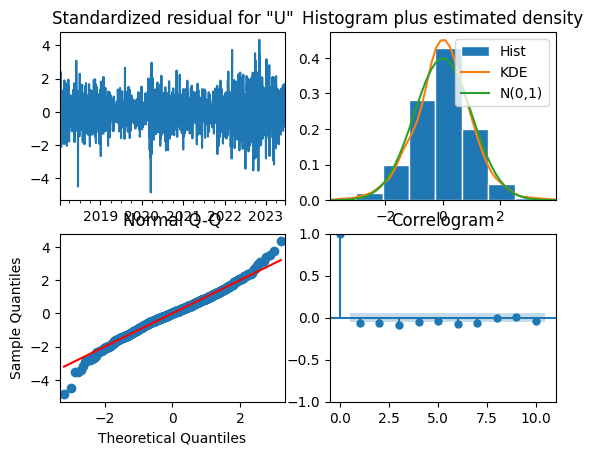

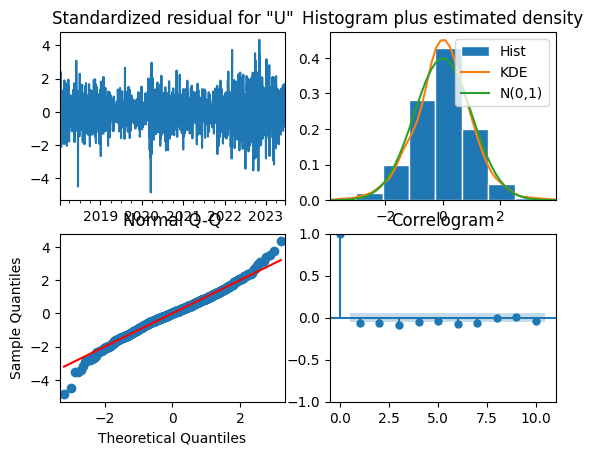

In [94]:
cur_model_fit.plot_diagnostics()

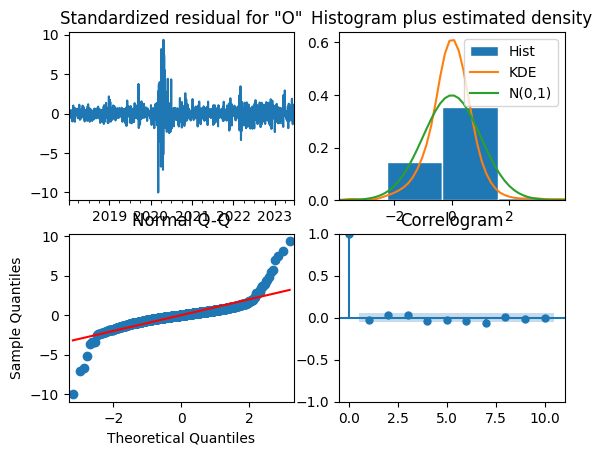

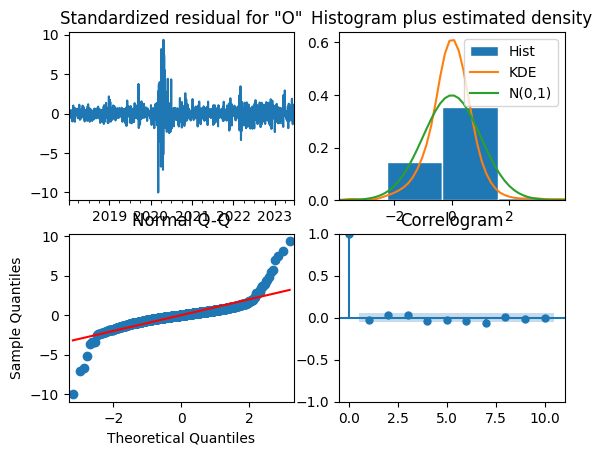

In [95]:
oil_model_fit.plot_diagnostics()

# Forecasting on Test Data for Oil

In [96]:
forecast_oil = oil_model_fit.get_forecast(steps=len(test_data))

# Create a new dataframe to hold the forecast
df_forecast_oil = forecast_oil.conf_int()

# Create a new column for the forecasted values
df_forecast_oil['Oil forecast'] = forecast_oil.predicted_mean

df_forecast_oil

,lower Oil_Price_Returns_diff,upper Oil_Price_Returns_diff,Oil forecast
2023-06-23,-0.044897,0.062149,0.008626
2023-06-26,-0.075900,0.065312,-0.005294
2023-06-27,-0.064464,0.077702,0.006619
2023-06-28,-0.075618,0.066620,-0.004499
2023-06-29,-0.072715,0.071481,-0.000617
...,...,...,...
2024-07-22,-0.075495,0.075486,-0.000005
2024-07-23,-0.075495,0.075486,-0.000005
2024-07-24,-0.075495,0.075486,-0.000005
2024-07-25,-0.075495,0.075486,-0.000005


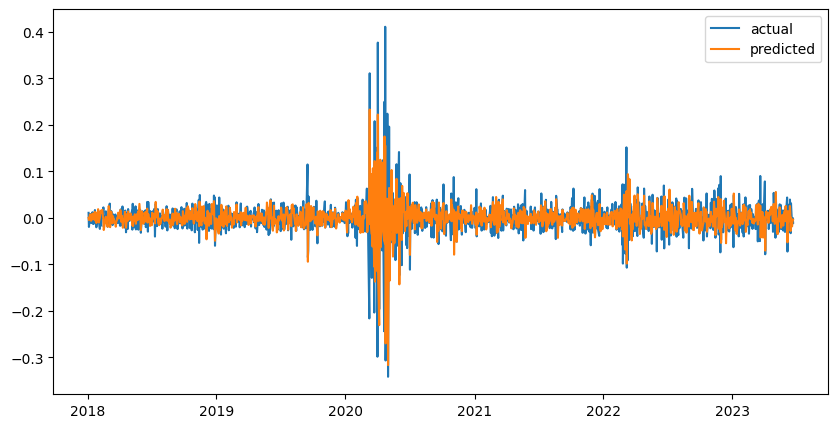

In [97]:
# Get in-sample predictions
in_sample_predictions = oil_model_fit.get_prediction(start=selected_data.index.min(),
                                                      end=selected_data.index.max(),
                                                      dynamic=False)

# Create a new dataframe to hold the in-sample predictions
df_in_sample = in_sample_predictions.conf_int()

# Create a new column for the predicted values
selected_data['predicted_oil_price'] = in_sample_predictions.predicted_mean

# Plot the actual and predicted values
plt.figure(figsize=(10, 5))
plt.plot(selected_data['Oil_Price_Returns_diff'], label='actual')
plt.plot(selected_data['predicted_oil_price'], label='predicted')
plt.legend()
plt.show()


In [98]:
selected_data

,USD_EUR_Price,Oil_Price,USD_EUR_Price_diff,USD_EUR_Price_Returns_diff,Oil_Price_diff,Oil_Price_Returns_diff,predicted_oil_price
Date,,,,,,,
2018-01-04,1.201043,66.13,-0.005303,-0.008715,1.00,0.010881,-0.000005
2018-01-05,1.206884,65.86,0.005841,0.009260,-0.27,-0.019437,-0.004749
2018-01-08,1.203746,65.85,-0.003138,-0.007464,-0.01,0.003931,0.007692
2018-01-09,1.197046,66.39,-0.006700,-0.002966,0.54,0.008352,0.003605
2018-01-10,1.192933,67.24,-0.004113,0.002131,0.85,0.004603,-0.001629
...,...,...,...,...,...,...,...
2023-06-16,1.094595,75.89,0.010290,0.004513,1.69,0.031328,0.000591
2023-06-19,1.094212,76.45,-0.000383,-0.009840,0.56,-0.015397,-0.018361
2023-06-20,1.092430,76.85,-0.001781,-0.001278,0.40,-0.002147,-0.007732


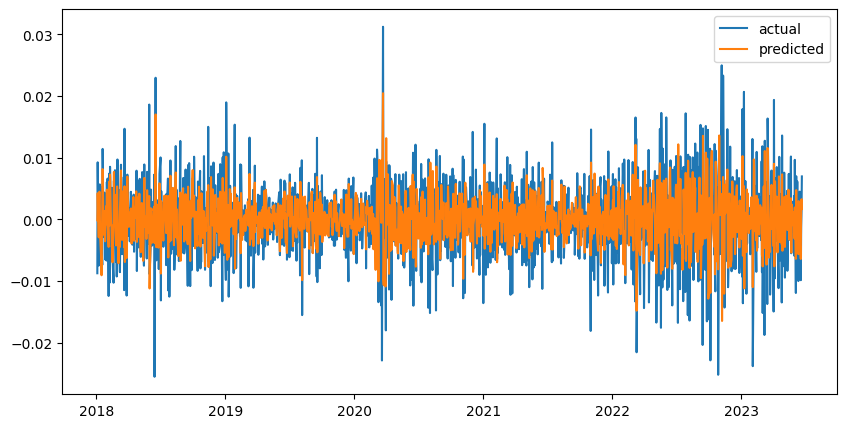

In [121]:
from datetime import timedelta

# Get in-sample predictions
in_sample_predictions = cur_model_fit.get_prediction(start=selected_data.index.min(),
                                                      end=selected_data.index.max(),
                                                      dynamic=False,
                                                     exog=selected_data['predicted_oil_price']
                                                     )

# Create a new dataframe to hold the in-sample predictions
df_in_sample = in_sample_predictions.conf_int()

# Create a new column for the predicted values
selected_data['predicted_cur_price'] = in_sample_predictions.predicted_mean

# Plot the actual and predicted values
plt.figure(figsize=(10, 5))
plt.plot(selected_data['USD_EUR_Price_Returns_diff'], label='actual')
plt.plot(selected_data['predicted_cur_price'], label='predicted')
plt.legend()
plt.show()


# Forecasting on Test Data for Currency

In [100]:
forecast_cur = cur_model_fit.get_forecast(steps=len(test_data),exog=test_data['Oil_Price_Returns_diff'])

# Create a new dataframe to hold the forecast
df_forecas_cur = forecast_cur.conf_int()

# Create a new column for the forecasted values
df_forecas_cur['Currency forecast'] = forecast_cur.predicted_mean

df_forecas_cur

,lower USD_EUR_Price_Returns_diff,upper USD_EUR_Price_Returns_diff,Currency forecast
2023-06-23,-0.013503,0.005430,-4.036735e-03
2023-06-26,-0.012868,0.011270,-7.993604e-04
2023-06-27,-0.011753,0.012394,3.201961e-04
2023-06-28,-0.011982,0.012169,9.337367e-05
2023-06-29,-0.012173,0.011981,-9.605569e-05
...,...,...,...
2024-07-22,-0.012427,0.011728,-3.491495e-04
2024-07-23,-0.011909,0.012246,1.682673e-04
2024-07-24,-0.012056,0.012099,2.153858e-05
2024-07-25,-0.012078,0.012077,-4.931908e-07


In [101]:
test_data.index

DatetimeIndex(['2022-05-19', '2022-05-20', '2022-05-23', '2022-05-24',
               '2022-05-25', '2022-05-26', '2022-05-27', '2022-05-30',
               '2022-05-31', '2022-06-01',
               ...
               '2023-06-09', '2023-06-12', '2023-06-13', '2023-06-14',
               '2023-06-15', '2023-06-16', '2023-06-19', '2023-06-20',
               '2023-06-21', '2023-06-22'],
              dtype='datetime64[ns]', name='Date', length=286, freq=None)

In [102]:
# Create a DataFrame for predicted values with a date column
predicted_df = pd.DataFrame({'Date': test_data.index, 'Cur_Predicted_Value': df_forecas_cur['Currency forecast'] ,'Cur lower': df_forecas_cur['lower USD_EUR_Price_Returns_diff'],'Cur Upper':df_forecas_cur['upper USD_EUR_Price_Returns_diff']
                             ,'Oil_Predicted_Value': df_forecast_oil['Oil forecast'] ,'Oil lower': df_forecast_oil['lower Oil_Price_Returns_diff'],'Oil Upper':df_forecast_oil['upper Oil_Price_Returns_diff']
                             })
predicted_df.set_index('Date', inplace=True)
predicted_df

,Cur_Predicted_Value,Cur lower,Cur Upper,Oil_Predicted_Value,Oil lower,Oil Upper
Date,,,,,,
2022-05-19,-4.036735e-03,-0.013503,0.005430,0.008626,-0.044897,0.062149
2022-05-20,-7.993604e-04,-0.012868,0.011270,-0.005294,-0.075900,0.065312
2022-05-23,3.201961e-04,-0.011753,0.012394,0.006619,-0.064464,0.077702
2022-05-24,9.337367e-05,-0.011982,0.012169,-0.004499,-0.075618,0.066620
2022-05-25,-9.605569e-05,-0.012173,0.011981,-0.000617,-0.072715,0.071481
...,...,...,...,...,...,...
2023-06-16,-3.491495e-04,-0.012427,0.011728,-0.000005,-0.075495,0.075486
2023-06-19,1.682673e-04,-0.011909,0.012246,-0.000005,-0.075495,0.075486
2023-06-20,2.153858e-05,-0.012056,0.012099,-0.000005,-0.075495,0.075486


#Combining predicted data with actual test data

In [103]:
# Merge the predicted DataFrame with the test data
combined_data = test_data.merge(predicted_df, left_index=True, right_index=True)
combined_data

,USD_EUR_Price,Oil_Price,USD_EUR_Price_diff,USD_EUR_Price_Returns_diff,Oil_Price_diff,Oil_Price_Returns_diff,Cur_Predicted_Value,Cur lower,Cur Upper,Oil_Predicted_Value,Oil lower,Oil Upper
Date,,,,,,,,,,,,
2022-05-19,1.047274,111.94,-0.007512,-0.017553,-2.90,-0.005953,-4.036735e-03,-0.013503,0.005430,0.008626,-0.044897,0.062149
2022-05-20,1.057899,114.69,0.010625,0.017267,2.75,0.049819,-7.993604e-04,-0.012868,0.011270,-0.005294,-0.075900,0.065312
2022-05-23,1.056982,115.95,-0.000917,-0.011012,1.26,-0.013581,3.201961e-04,-0.011753,0.012394,0.006619,-0.064464,0.077702
2022-05-24,1.068205,114.96,0.011223,0.011485,-0.99,-0.019524,9.337367e-05,-0.011982,0.012169,-0.004499,-0.075618,0.066620
2022-05-25,1.073653,115.83,0.005448,-0.005518,0.87,0.016106,-9.605569e-05,-0.012173,0.011981,-0.000617,-0.072715,0.071481
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-16,1.094595,75.89,0.010290,0.004513,1.69,0.031328,-3.491495e-04,-0.012427,0.011728,-0.000005,-0.075495,0.075486
2023-06-19,1.094212,76.45,-0.000383,-0.009840,0.56,-0.015397,1.682673e-04,-0.011909,0.012246,-0.000005,-0.075495,0.075486
2023-06-20,1.092430,76.85,-0.001781,-0.001278,0.40,-0.002147,2.153858e-05,-0.012056,0.012099,-0.000005,-0.075495,0.075486


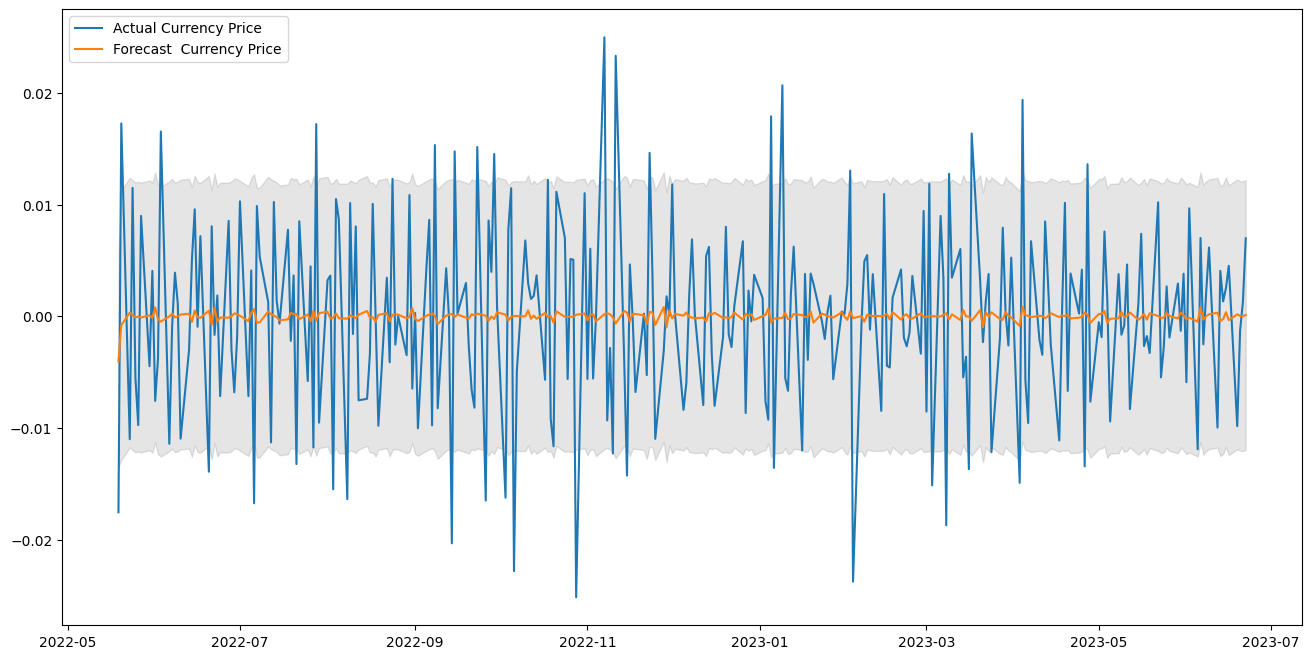

In [104]:
plt.figure(figsize=(16,8))
plt.plot(combined_data['USD_EUR_Price_Returns_diff'],label="Actual Currency Price")
plt.plot(combined_data['Cur_Predicted_Value'],label="Forecast  Currency Price")
plt.fill_between(combined_data.index,combined_data['Cur lower'],combined_data['Cur Upper'],color='k',alpha=0.1)
plt.legend(loc="upper left")

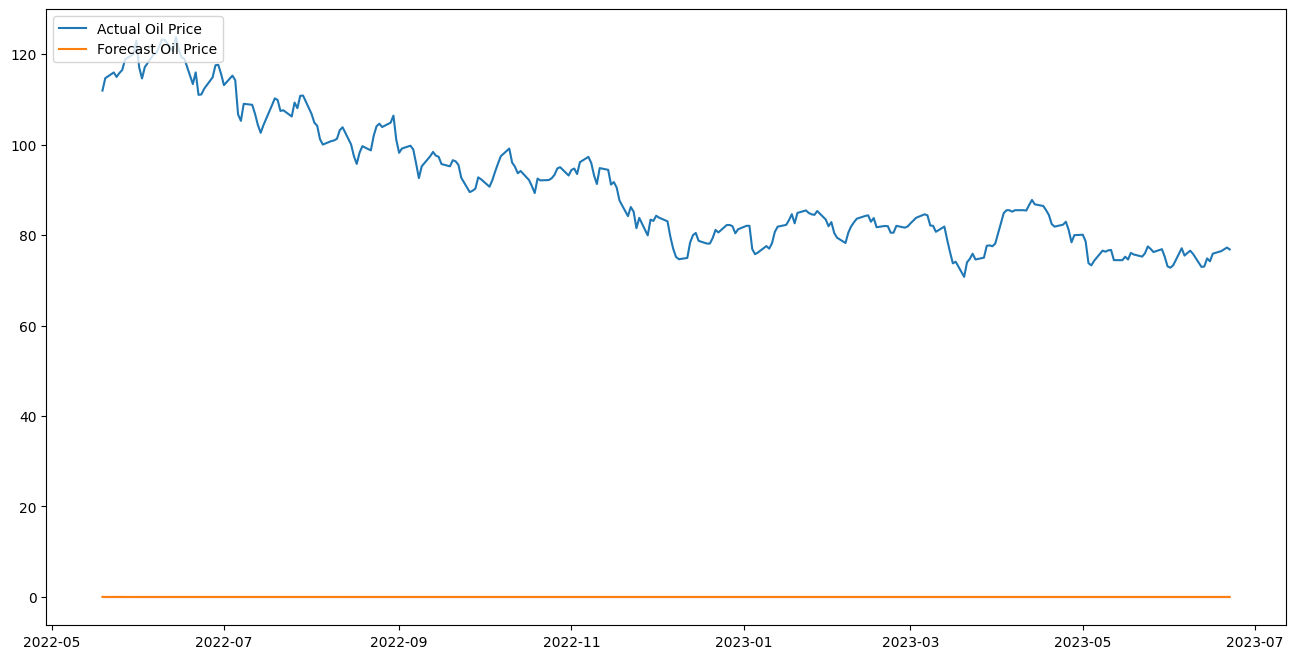

In [105]:
plt.figure(figsize=(16,8))
plt.plot(combined_data['Oil_Price'],label="Actual Oil Price")
plt.plot(combined_data['Oil_Predicted_Value'],label="Forecast Oil Price")
plt.fill_between(combined_data.index,combined_data['Oil lower'],combined_data['Oil Upper'],color='k',alpha=0.1)
plt.legend(loc="upper left")

# Model Metrics evaluation


In [106]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return {"Mean Absolute Error": mae, "Mean Squared Error": mse, "Root Mean Squared Error": rmse, "Mean Absolute Percentage Error": mape}



In [107]:
metrics = calculate_metrics(combined_data['USD_EUR_Price'], combined_data['Cur_Predicted_Value'])
metrics

{'Mean Absolute Error': 1.0480137526770954,
 'Mean Squared Error': 1.0997721786656511,
 'Root Mean Squared Error': 1.0487002329863626,
 'Mean Absolute Percentage Error': 100.00170011379011}

In [108]:
metrics = calculate_metrics(combined_data['Oil_Price'], combined_data['Oil_Predicted_Value'])
metrics

{'Mean Absolute Error': 90.65973714658217,
 'Mean Squared Error': 8409.12318910119,
 'Root Mean Squared Error': 91.70127146938144,
 'Mean Absolute Percentage Error': 99.9999842543316}

#Executing model with complete dataset

In [109]:
selected_data

,USD_EUR_Price,Oil_Price,USD_EUR_Price_diff,USD_EUR_Price_Returns_diff,Oil_Price_diff,Oil_Price_Returns_diff,predicted_oil_price
Date,,,,,,,
2018-01-04,1.201043,66.13,-0.005303,-0.008715,1.00,0.010881,-0.000005
2018-01-05,1.206884,65.86,0.005841,0.009260,-0.27,-0.019437,-0.004749
2018-01-08,1.203746,65.85,-0.003138,-0.007464,-0.01,0.003931,0.007692
2018-01-09,1.197046,66.39,-0.006700,-0.002966,0.54,0.008352,0.003605
2018-01-10,1.192933,67.24,-0.004113,0.002131,0.85,0.004603,-0.001629
...,...,...,...,...,...,...,...
2023-06-16,1.094595,75.89,0.010290,0.004513,1.69,0.031328,0.000591
2023-06-19,1.094212,76.45,-0.000383,-0.009840,0.56,-0.015397,-0.018361
2023-06-20,1.092430,76.85,-0.001781,-0.001278,0.40,-0.002147,-0.007732


In [126]:

cur_model=ARIMA(selected_data['USD_EUR_Price_Returns_diff'].dropna(),order=(1,1,1),exog=selected_data['Oil_Price_Returns_diff'].dropna())
cur_model_fit=cur_model.fit()


In [127]:

oil_model=ARIMA(selected_data['Oil_Price_Returns_diff'],order=(1,1,1))
oil_model_fit=oil_model.fit()

In [128]:
def forecast_steps(oil_model_fit,cur_model_fit, steps):
    # Exog is None by default. If there are future values of the exogenous variable, you can pass them here.
    oil_result = oil_model_fit.forecast(steps=steps)
    result = cur_model_fit.forecast(steps=steps, exog=oil_result)
    forecast = result

    return forecast


# One Day Step Ahead

In [129]:
forecast_steps(oil_model_fit,cur_model_fit,1)

2023-06-23   -0.003282
Freq: B, dtype: float64

# Five Days Step Ahead

In [130]:
forecast_steps(oil_model_fit,cur_model_fit,5)

2023-06-23   -0.003282
2023-06-26    0.001549
2023-06-27   -0.000726
2023-06-28    0.000345
2023-06-29   -0.000159
Freq: B, Name: predicted_mean, dtype: float64

In [131]:
selected_data

,USD_EUR_Price,Oil_Price,USD_EUR_Price_diff,USD_EUR_Price_Returns_diff,Oil_Price_diff,Oil_Price_Returns_diff,predicted_oil_price,predicted_cur_price
Date,,,,,,,,
2018-01-04,1.201043,66.13,-0.005303,-0.008715,1.00,0.010881,-0.000005,-0.000123
2018-01-05,1.206884,65.86,0.005841,0.009260,-0.27,-0.019437,-0.004749,0.004252
2018-01-08,1.203746,65.85,-0.003138,-0.007464,-0.01,0.003931,0.007692,-0.002889
2018-01-09,1.197046,66.39,-0.006700,-0.002966,0.54,0.008352,0.003605,0.002744
2018-01-10,1.192933,67.24,-0.004113,0.002131,0.85,0.004603,-0.001629,0.004506
...,...,...,...,...,...,...,...,...
2023-06-16,1.094595,75.89,0.010290,0.004513,1.69,0.031328,0.000591,-0.003575
2023-06-19,1.094212,76.45,-0.000383,-0.009840,0.56,-0.015397,-0.018361,-0.006396
2023-06-20,1.092430,76.85,-0.001781,-0.001278,0.40,-0.002147,-0.007732,0.002585


In [123]:
newdata=selected_data[['USD_EUR_Price','USD_EUR_Price_Returns_diff','predicted_cur_price']]
newdata

,USD_EUR_Price,USD_EUR_Price_Returns_diff,predicted_cur_price
Date,,,
2018-01-04,1.201043,-0.008715,-0.000123
2018-01-05,1.206884,0.009260,0.004252
2018-01-08,1.203746,-0.007464,-0.002889
2018-01-09,1.197046,-0.002966,0.002744
2018-01-10,1.192933,0.002131,0.004506
...,...,...,...
2023-06-16,1.094595,0.004513,-0.003575
2023-06-19,1.094212,-0.009840,-0.006396
2023-06-20,1.092430,-0.001278,0.002585


In [125]:
newdata['Original_Predicted_value_diff']=newdata['predicted_cur_price'].shift(1)
newdata

,USD_EUR_Price,USD_EUR_Price_Returns_diff,predicted_cur_price,Original_Predicted_value_diff
Date,,,,
2018-01-04,1.201043,-0.008715,-0.000123,NaN
2018-01-05,1.206884,0.009260,0.004252,-0.000123
2018-01-08,1.203746,-0.007464,-0.002889,0.004252
2018-01-09,1.197046,-0.002966,0.002744,-0.002889
2018-01-10,1.192933,0.002131,0.004506,0.002744
...,...,...,...,...
2023-06-16,1.094595,0.004513,-0.003575,-0.001597
2023-06-19,1.094212,-0.009840,-0.006396,-0.003575
2023-06-20,1.092430,-0.001278,0.002585,-0.006396
